<a href="https://colab.research.google.com/github/AhmadRizkiadi/jsheet1-pengolahan-citra/blob/main/jsheet1_pengolahan_citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jsheet 1 Pengolahan Citra
## Nama = Ahmad Rizkiadi Budi Wirawan
## Kelas = TI-2B

P1. Mendefinisikan istilah bit, byte, kilobyte, megabyte dll pada citra

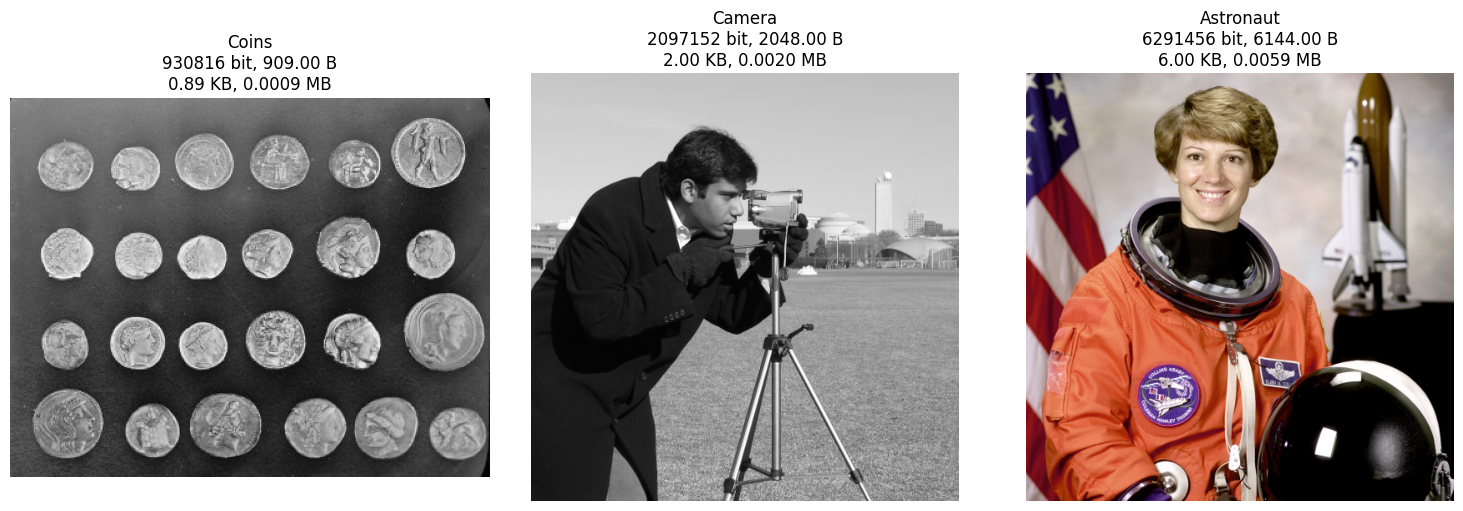

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Contoh gambar dari scikit-image
gambar_coins = data.coins()
gambar_camera = data.camera()
gambar_astronaut = data.astronaut()

# Fungsi untuk menghitung ukuran gambar dalam bit, byte, KB, MB
def hitung_ukuran(image):
  bit_per_pixel = 8 if len(image.shape) == 2 else 24 # Grayscale = 8 RGB = 24 bit
  total_pixels = image.shape[0] * image.shape[1]
  total_bits = total_pixels * bit_per_pixel
  total_bytes = total_bits / 1024
  total_kb = total_bytes / 1024
  total_mb = total_kb / 1024
  return total_bits, total_bytes, total_kb, total_mb

# Menyusun gambar dan ukurannya dalam satu baris
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# Daftar gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
  bits, bytes_, kb, mb = hitung_ukuran(img)
  ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  ax.set_title(f"{nama}\n{bits} bit, {bytes_:.2f} B\n{kb:.2f} KB, {mb:.4f} MB")
  ax.axis('off')

plt.tight_layout()
plt.show()


P2. Citra digital tersususn dari beberapa pixel

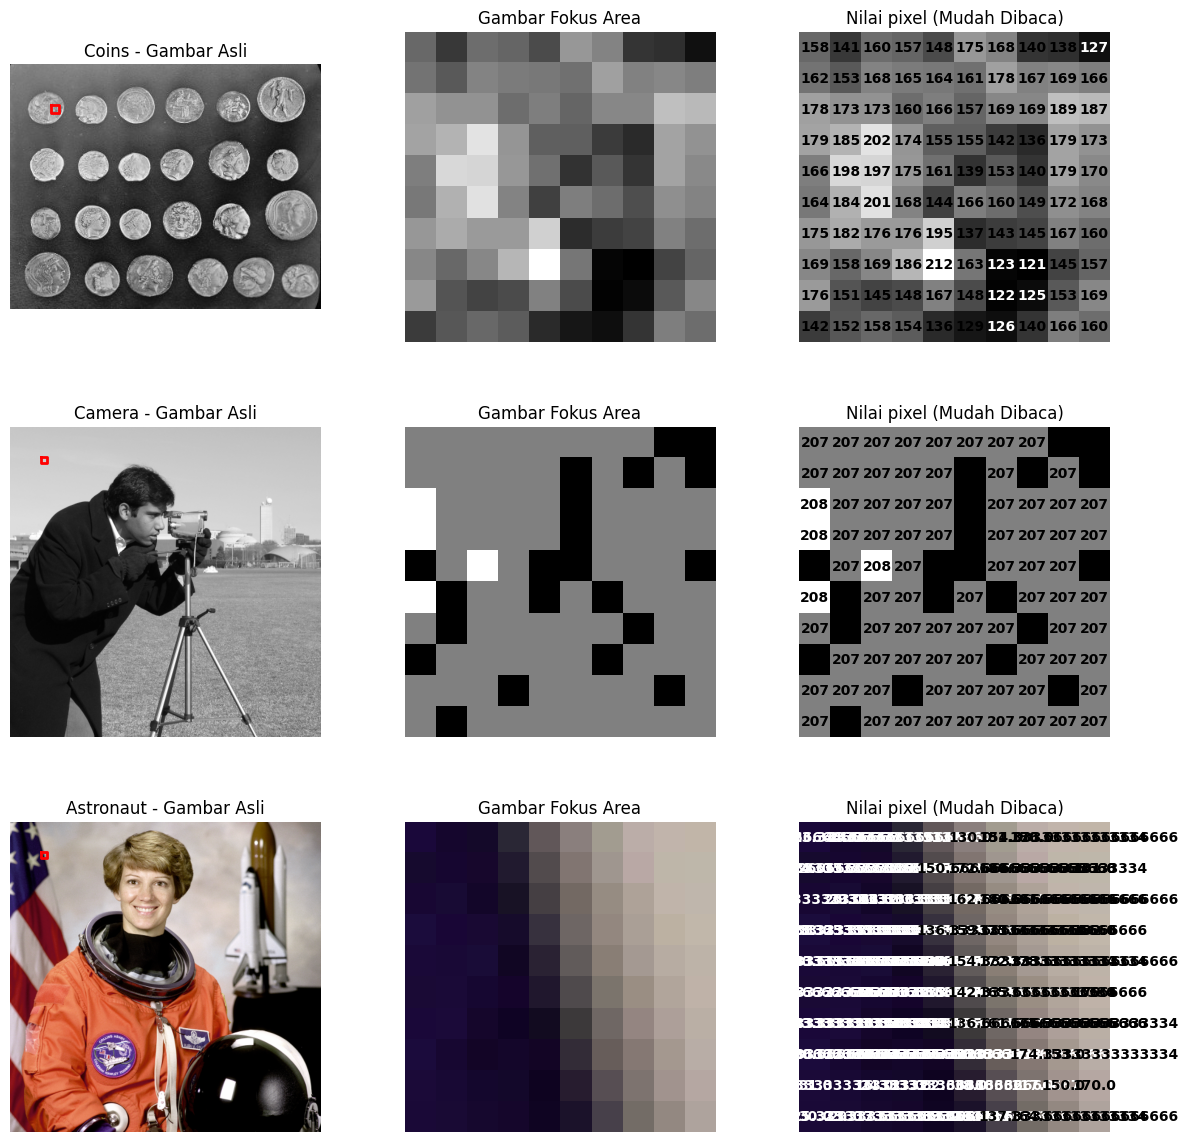

In [4]:
# Menampilkan bagaimana citra digital tersusun dari pixel dengan cara fokus yang ditandai

fig, axes = plt.subplots(3,3, figsize=(12,12))

# List gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

#koordinat area kecil yang di-zoom
x_start, x_end = 50, 60
y_start, y_end = 50, 60

for i, (img, nama) in enumerate(zip(gambar_list, nama_list)):
  # Gambar asli
  axes[i, 0].imshow(img,cmap='gray' if len(img.shape) == 2 else None)
  axes[i, 0].set_title(f"{nama} - Gambar Asli")
  axes[i, 0].axis('off')

  # Tambahkan kotak merah untuk menunjukkan area yang difokuska
  rect_x = [x_start, x_end, x_end, x_start, x_start]
  rect_y = [y_start, y_start, y_end, y_end, y_start]
  axes[i, 0].plot(rect_x, rect_y, color="red", linewidth=2)

  # Gambar fokus area
  zoomed_img = img[y_start:y_end, x_start:x_end]
  axes[i, 1].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None,interpolation='nearest')
  axes[i, 1].set_title("Gambar Fokus Area")
  axes[i, 1].axis('off')

  # Menampilkan nilai pixel dalam area yang di-zoom (khusus RGB, gunakan rata-rata kanal)
  axes[i, 2].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')

  for y in range(zoomed_img.shape[0]):
    for x in range(zoomed_img.shape[1]):
      if len(img.shape) == 3: #jika RGB, ambil nilai rata-rata pixel untuk tampilan angka
        pixel_value = np.mean(zoomed_img[y, x].astype(int))
      else:
        pixel_value = zoomed_img[y,x]

      # Pilih warna tteks agar mudah dibaca di latar belakang
      text_color = "White" if pixel_value < 128 else "black"
      axes[i, 2].text(x, y, str(pixel_value), color=text_color, ha='center', va='center', fontsize=10, fontweight='bold')

  axes[i, 2].set_title("Nilai pixel (Mudah Dibaca)")
  axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


P3.Citra disimpan dalam Array


 === Coins ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (303, 384)
Tipe Nilai Pixel: uint8
Contoh nilai pixel (5x5 pertama) :
[[ 47 123 133 129 137]
 [ 93 144 145 143 145]
 [126 147 143 147 145]
 [131 136 133 139 136]
 [131 133 134 135 129]]

 === Camera ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (512, 512)
Tipe Nilai Pixel: uint8
Contoh nilai pixel (5x5 pertama) :
[[200 200 200 200 199]
 [200 199 199 200 199]
 [199 199 199 200 200]
 [200 200 199 199 199]
 [200 200 200 200 199]]

 === Astroaut ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: (512, 512, 3)
Tipe Nilai Pixel: uint8
Contoh nilai pixel (5x5 pertama) :
[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  [ 54  51  98]
  [ 76  76 106]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  [106 107 120]
  [128 128 131]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  [159 157 157]
  [167 165 161]]

 [[220 213 210]
  [214 206 206]
  [202 198 196]
  [197 191 193]
  [200 194 196]]

 [[232 223 223]
  [226 220 215]
  [221 215 

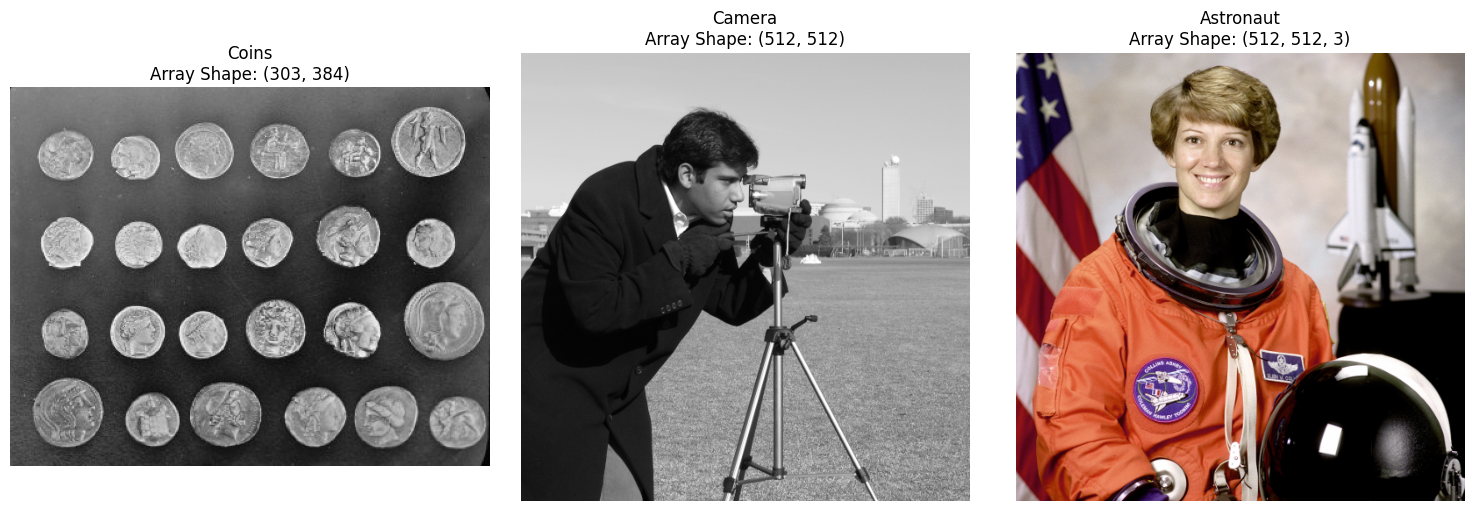

In [5]:
# Menjelaskan bagaimana citra disimpan dalam array NumPy

import numpy as np

# Memuat gambar dari sckikit-image
gambar_coins = data.coins()
gambar_camera = data.camera()
gambar_astronaut = data.astronaut()

# Fungsi untuk menampilkan informasi array NumPy dari gambar
def info_array_numpy(image, nama):
  print(f"\n === {nama} ===")
  print(f"Tipe Data: {type(image)}") # Harusya <class 'numpy.ndarray'>
  print(f"Dimensi: {image.shape}") # Menampilkan dimensi gambar (height, width, channel jika RGB)
  print(f"Tipe Nilai Pixel: {image.dtype}") # Menampilkan tipe data dalam array (uint8)

  # Menampilkan sebagian kecil dari array (5x5 pixel pertama)
  print("Contoh nilai pixel (5x5 pertama) :")
  print(image[:5, :5] if len(image.shape) == 2 else image[:5, :5, :])

# Menampilkan informasi setiap gambar
info_array_numpy(gambar_coins, "Coins")
info_array_numpy(gambar_camera, "Camera")
info_array_numpy(gambar_astronaut, "Astroaut")

# Visualisasi bagaimana array Numpy mewakili citra
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
  ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  ax.set_title(f"{nama}\nArray Shape: {img.shape}")
  ax.axis('off')

plt.tight_layout()
plt.show()


P4. Sistem Koordinat Kiri Atas Dalam Citra Digital